### Notebook: Knowledge Graph

In [1]:
# %pip install --upgrade --quiet  langchain langchain-community langchain-openai neo4j

In [1]:
import pandas as pd

### Data Exploration

In [2]:
df = pd.read_csv("../data/transformed_full_data.csv")
df.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,description
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4,The song 'Mr. Brightside' by The Killers is a ...
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4,The song 'Wonderwall' by Oasis is a nan track ...
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4,The song 'Come as You Are' by Nirvana is a RnB...
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4,The song 'Take Me Out' by Franz Ferdinand is a...
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4,The song 'Creep' by Radiohead is a RnB track r...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50682 entries, 0 to 50681
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50681 non-null  object 
 1   name                 50682 non-null  object 
 2   artist               50682 non-null  object 
 3   spotify_preview_url  50682 non-null  object 
 4   spotify_id           50682 non-null  object 
 5   tags                 49555 non-null  object 
 6   genre                22347 non-null  object 
 7   year                 50682 non-null  int64  
 8   duration_ms          50682 non-null  int64  
 9   danceability         50682 non-null  float64
 10  energy               50682 non-null  float64
 11  key                  50682 non-null  int64  
 12  loudness             50682 non-null  float64
 13  mode                 50682 non-null  int64  
 14  speechiness          50682 non-null  float64
 15  acousticness         50682 non-null 

In [4]:
df.columns

Index(['track_id', 'name', 'artist', 'spotify_preview_url', 'spotify_id',
       'tags', 'genre', 'year', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'description'],
      dtype='object')

In [5]:
100*df.genre.value_counts(normalize=True)

genre
Rock          44.592115
Electronic    16.601781
Metal         11.254307
Pop            5.123730
Rap            3.673871
Jazz           3.548575
RnB            3.114512
Reggae         3.092138
Country        2.716248
Punk           1.713877
Folk           1.588580
New Age        1.060545
Blues          0.845751
World          0.626482
Latin          0.447487
Name: proportion, dtype: float64

In [6]:
tdf = df.dropna().copy()
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21915 entries, 2 to 50681
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             21915 non-null  object 
 1   name                 21915 non-null  object 
 2   artist               21915 non-null  object 
 3   spotify_preview_url  21915 non-null  object 
 4   spotify_id           21915 non-null  object 
 5   tags                 21915 non-null  object 
 6   genre                21915 non-null  object 
 7   year                 21915 non-null  int64  
 8   duration_ms          21915 non-null  int64  
 9   danceability         21915 non-null  float64
 10  energy               21915 non-null  float64
 11  key                  21915 non-null  int64  
 12  loudness             21915 non-null  float64
 13  mode                 21915 non-null  int64  
 14  speechiness          21915 non-null  float64
 15  acousticness         21915 non-null  floa

In [7]:
### User History Dataset
user_df = pd.read_csv("../data/userHistory.csv")
user_df.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [8]:
user_mapping_dict = {}

for i, j in enumerate(user_df.user_id.unique()):
    user_mapping_dict[j] = f'user_{i+1}'


user_df['user'] = user_df['user_id'].apply(lambda x: user_mapping_dict[x])
user_df.head()

,track_id,user_id,playcount,user
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,user_1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,user_1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,user_1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,user_1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,user_1


In [9]:
user_df.user_id.nunique(), user_df.track_id.nunique()

(962037, 30459)

In [10]:
user_agg = user_df.groupby('track_id').agg({
    'playcount': 'sum',
    'user': lambda x: '|'.join(x.unique()[:5])
}).reset_index()

user_agg.head()

,track_id,playcount,user
0,TRAAAED128E0783FAB,315,user_2500|user_3101|user_13797|user_16086|user...
1,TRAAAHD128F42635A5,2,user_634462|user_821695
2,TRAAAQO12903CD8E1C,1,user_390084
3,TRAABJS128F9325C99,1831,user_68|user_1226|user_1308|user_2007|user_2689
4,TRAABXA128F9326351,37,user_46016|user_54576|user_81039|user_105500|u...


In [11]:
user_agg.user[0]

'user_2500|user_3101|user_13797|user_16086|user_17643'

In [12]:
user_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30459 entries, 0 to 30458
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   track_id   30459 non-null  object
 1   playcount  30459 non-null  int64 
 2   user       30459 non-null  object
dtypes: int64(1), object(2)
memory usage: 714.0+ KB


### Final Transformed Dataset

In [13]:
fdf = tdf.merge(user_agg, on='track_id', how='inner')
print(fdf.shape)
fdf.head()

(16118, 24)


,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,description,playcount,user
0,TRIODZU128E078F3E2,Under the Bridge,Red Hot Chili Peppers,https://p.scdn.co/mp3-preview/90e41778392f27b6...,06zh28PcYIFvNOAz5Wq2Xb,"rock, alternative, alternative_rock, 90s, funk",Pop,2003,265506,0.554,...,0.0457,0.0168,0.000534,0.1360,0.513,84.275,4,The song 'Under the Bridge' by Red Hot Chili P...,990,user_902|user_925|user_1476|user_2342|user_3302
1,TRYEZGE128F92D04C8,Feel Good Inc.,Gorillaz,https://p.scdn.co/mp3-preview/7388c425022ced92...,09xrHi86kLkEIzDLZiHNnv,"rock, electronic, alternative, indie, pop, alt...",RnB,2010,223106,0.809,...,0.1360,0.0337,0.001410,0.8260,0.832,138.556,4,The song 'Feel Good Inc.' by Gorillaz is a RnB...,98,user_43308|user_45810|user_111140|user_129706|...
2,TRIQWYH128F1486062,Paranoid Android,Radiohead,https://p.scdn.co/mp3-preview/d68bd7fa4f0bd86e...,0bomiLGPTUNyk3mV19pbwN,"rock, electronic, alternative, indie, alternat...",Jazz,2012,384933,0.232,...,0.0573,0.0523,0.006060,0.1180,0.299,81.849,4,The song 'Paranoid Android' by Radiohead is a ...,1075,user_748|user_1787|user_3559|user_4215|user_4558
3,TRUOEWJ128F9345A85,Stairway to Heaven,Led Zeppelin,https://p.scdn.co/mp3-preview/6879ce58805099f6...,03hLW9osM6UuNqlpwL8XPo,"rock, classic_rock, hard_rock, progressive_roc...",Punk,2013,488019,0.354,...,0.0509,0.6250,0.011200,0.3500,0.212,80.360,4,The song 'Stairway to Heaven' by Led Zeppelin ...,566,user_720|user_5148|user_9714|user_15063|user_2...
4,TRNNGMK128F423F034,Where Is My Mind?,Pixies,https://p.scdn.co/mp3-preview/d4a375a9c19d4ea8...,0DJU6KGwdkxEPCy3BZ3UZY,"rock, alternative, indie, alternative_rock, in...",Rock,2005,230093,0.514,...,0.0353,0.0078,0.000859,0.0802,0.212,82.104,4,The song 'Where Is My Mind?' by Pixies is a Ro...,32185,user_24|user_74|user_158|user_203|user_230


In [14]:
# fdf.to_csv("../data/final_transformer_data_kg.csv", index=False)

In [43]:
# fdf.sample(1000).to_csv("../data/final_transformer_data_kg_1000.csv", index=False)

In [44]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16118 entries, 0 to 16117
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             16118 non-null  object 
 1   name                 16118 non-null  object 
 2   artist               16118 non-null  object 
 3   spotify_preview_url  16118 non-null  object 
 4   spotify_id           16118 non-null  object 
 5   tags                 16118 non-null  object 
 6   genre                16118 non-null  object 
 7   year                 16118 non-null  int64  
 8   duration_ms          16118 non-null  int64  
 9   danceability         16118 non-null  float64
 10  energy               16118 non-null  float64
 11  key                  16118 non-null  int64  
 12  loudness             16118 non-null  float64
 13  mode                 16118 non-null  int64  
 14  speechiness          16118 non-null  float64
 15  acousticness         16118 non-null 

# Audio Features Explanation

- **acousticness**: Confidence (0-1) that track is acoustic. 1.0 = highly acoustic.
- **danceability**: Suitability (0-1) for dancing based on tempo, rhythm, beat, regularity.
- **duration_ms**: Track duration in milliseconds.
- **energy**: Intensity measure (0-1). High energy tracks are fast, loud, noisy.
- **instrumentalness**: Predicts (0-1) absence of vocals. >0.5 likely instrumental.
- **key**: Track key. Integers map to pitches (0=C, 1=C♯/D♭, etc.).
- **liveness**: Detects audience presence. >0.8 likely live recording.
- **loudness**: Overall track loudness (dB). Typically -60 to 0 db.
- **mode**: Modality. 1 = major, 0 = minor.
- **speechiness**: Presence of spoken words (0-1). >0.66 likely speech-only.
- **tempo**: Estimated tempo in beats per minute (BPM).
- **time_signature**: Estimated overall time signature of track.
- **valence**: Musical positiveness (0-1). High = positive mood, Low = negative mood.

In [45]:
# cols = ['tags', 'genre', 'year', 'duration_ms', 'danceability', 'energy', 'key',
#        'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
#        'liveness', 'valence', 'tempo', 'time_signature', 'description']

# drop_feats = ['duration_ms', 'key', 'mode', 'description']
# # for i in cols:
# #     print(f"{i}: has {df[i].nunique()} values and valuecounts of:\n{100*df[i].describe()}\n\n")

In [46]:
drop_feats = ['duration_ms', 'key', 'mode', 'description']


# Select columns with numeric data types
numeric_feats = df.drop(drop_feats, axis=1).select_dtypes(include=['number']).columns.tolist()
cat_feats = df.drop(drop_feats, axis=1).select_dtypes(exclude=['number']).columns.tolist()

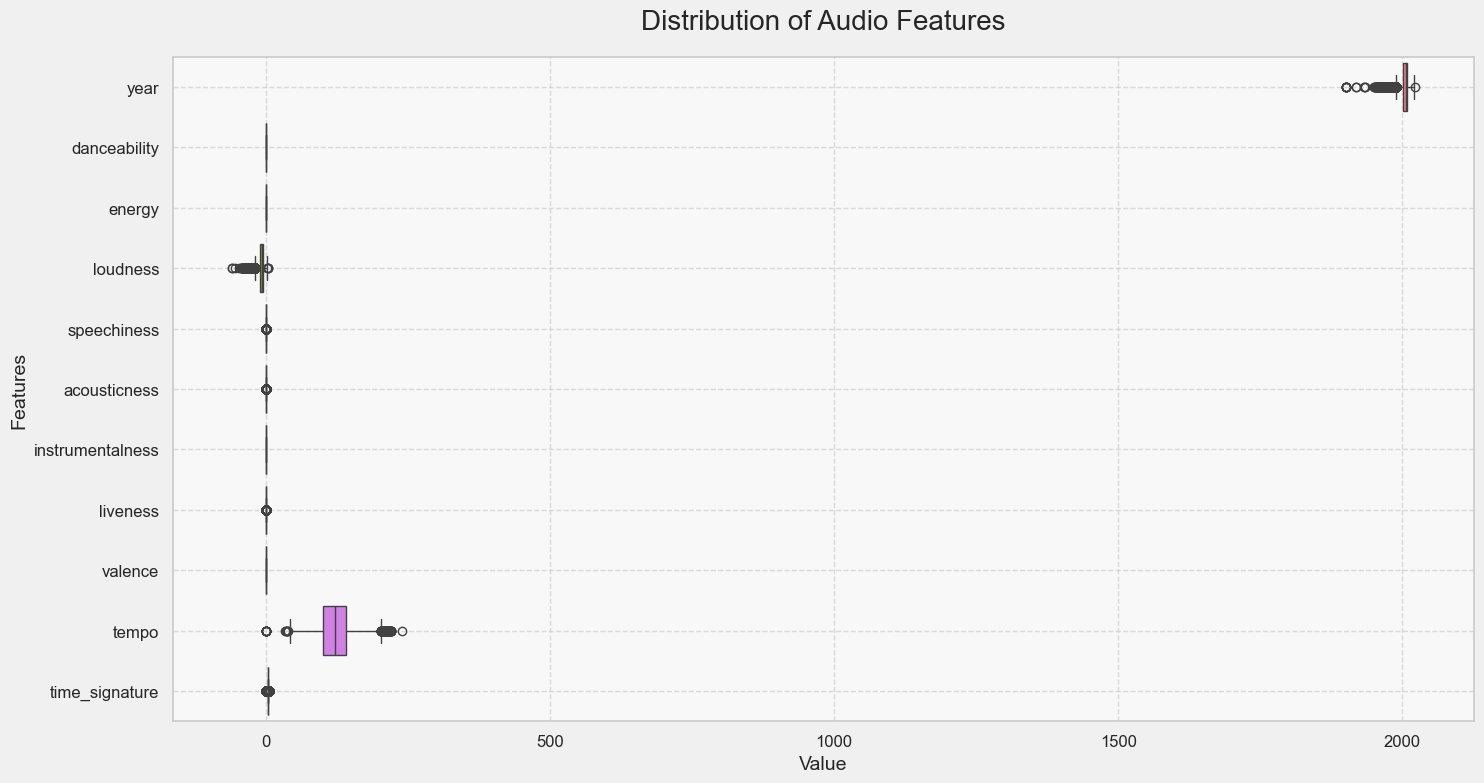

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot
# features = ['danceability', 'energy',  'speechiness', 
#             'acousticness', 'instrumentalness', 'liveness', 'valence']


features = numeric_feats

# Set the style and color palette
sns.set(style="whitegrid")
colors = sns.color_palette("husl", n_colors=len(features))

# Create the figure and axes
fig, ax = plt.subplots(figsize=(15, 8))

# Create the box plot
sns.boxplot(data=df[features], orient='h', palette=colors, ax=ax)

# Customize the plot
ax.set_title('Distribution of Audio Features', fontsize=20, pad=20)
ax.set_xlabel('Value', fontsize=14)
ax.set_ylabel('Features', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Add a subtle background color
fig.patch.set_facecolor('#F0F0F0')
ax.set_facecolor('#F8F8F8')

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### List down all the important entities and their relationships

Entities: 
    Artist --> 
    Song --> Name, Trackid, Tags, Genre, Year, Duration, Danceability, Energy, Key, Loudness, Mode, Spechiness, acousticness, Intrumentalness, Liveness, Valence, Tempo

In [23]:
import os
from langchain_community.graphs import Neo4jGraph

os.environ["NEO4J_URI"] = ""
os.environ["NEO4J_USERNAME"] = ""
os.environ["NEO4J_PASSWORD"] = ""

graph = Neo4jGraph()

graph.refresh_schema()
print(graph.schema)

Node properties:

Relationship properties:

The relationships:



In [53]:
p_query = """
LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/jkkn31/music-discovery-techjam/main/data/final_transformer_data_kg_1000.csv'
AS row
MERGE (song:Song {name: row.name})
MERGE (genre:Genre {name: row.genre})
MERGE (year:Year {name: row.year})
MERGE (artist:Artist {name: row.artist})
MERGE (likes:Likes {name: row.playcount})

FOREACH (tag_name in split(row.tags, ', ') | 
    MERGE (tag:Tag {name:trim(tag_name)})
    MERGE (song)-[:HAS_TAG]->(tag))

FOREACH (user_name in split(row.user, '|') | 
    MERGE (user:User {name:trim(user_name)})
    MERGE (song)-[:LISTEN_BY]->(user))

MERGE (danceability:Danceability {name: row.danceability})
MERGE (acousticness:Acousticness {name: row.acousticness})
MERGE (energy:Energy {name: row.energy})
MERGE (liveness:Liveness {name: row.liveness})
MERGE (tempo:Tempo {name: row.tempo})
MERGE (valence:Valence {name: row.valence})


MERGE (song)-[:PERFORMED_BY]->(artist)
MERGE (song)-[:HAS_DANCEABILITY]->(danceability)
MERGE (song)-[:HAS_ACOUSTICNESS]->(acousticness)
MERGE (song)-[:HAS_ENERGY]->(energy)
MERGE (song)-[:HAS_LIVENESS]->(liveness)
MERGE (song)-[:HAS_TEMPO]->(tempo)
MERGE (song)-[:HAS_VALENCE]->(valence)

MERGE (song)-[:RELEASED_IN]->(year)
MERGE (song)-[:HAS_GENRE]->(genre)
MERGE (song)-[:TOTAL_LIKES]->(likes)

MERGE (artist)-[:HAS_GENRE]->(genre)
MERGE (user)-[:TAGGED]->(tag)
MERGE (user)-[:LIKED]->(likes)

"""

graph.query(p_query)

[]

In [54]:
graph.refresh_schema()
print(graph.schema)

Node properties:
Song {name: STRING}
Genre {name: STRING}
Year {name: STRING}
Artist {name: STRING}
Likes {name: STRING}
Tag {name: STRING}
User {name: STRING}
Danceability {name: STRING}
Acousticness {name: STRING}
Energy {name: STRING}
Liveness {name: STRING}
Tempo {name: STRING}
Valence {name: STRING}
Relationship properties:

The relationships:
(:Song)-[:HAS_TAG]->(:Tag)
(:Song)-[:LISTEN_BY]->(:User)
(:Song)-[:PERFORMED_BY]->(:Artist)
(:Song)-[:HAS_DANCEABILITY]->(:Danceability)
(:Song)-[:HAS_ACOUSTICNESS]->(:Acousticness)
(:Song)-[:HAS_ENERGY]->(:Energy)
(:Song)-[:HAS_LIVENESS]->(:Liveness)
(:Song)-[:HAS_TEMPO]->(:Tempo)
(:Song)-[:HAS_VALENCE]->(:Valence)
(:Song)-[:RELEASED_IN]->(:Year)
(:Song)-[:HAS_GENRE]->(:Genre)
(:Song)-[:TOTAL_LIKES]->(:Likes)
(:Artist)-[:HAS_GENRE]->(:Genre)
